# Import necessary libraries

In [1]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Model metrics for evaluation and data splitting & KFold
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score, mean_absolute_error, make_scorer
from sklearn.model_selection import train_test_split, cross_val_score, KFold

from sklearn import metrics


from imblearn.over_sampling import  SMOTENC

# Visualization for missing data
import missingno as msno

# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# Model building
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (
    AdaBoostRegressor,
    GradientBoostingRegressor,
    RandomForestRegressor,
    BaggingRegressor,
)


# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

from xgboost import XGBRegressor

#SHAP
import shap

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


# Data loading

In [2]:
All = pd.ExcelFile('allData.xls')
data = pd.read_excel(All, 'Data')
data

,Number,Data source,Selected,Mix number in literature,ASTM type 1 ordinary Portland Cement content (kg/m^3),CEM I 42.5N ordinary Portland Cement content (kg/m^3),CEM I 52.5N ordinary Portland Cement content (kg/m^3),Class C Fly ash content (kg/m^3),Class F Fly ash content (kg/m^3),Slag content (kg/m^3),...,Annual average temperature of exposed environment (Celsius degree),Annual wetting times/rainy days of exposed environment (d),Annual average precipitation of exposed environment (mm),Slump (mm),Average 28-day compressive strength (Mpa),Average 28-day split strength (Mpa),Chloride diffusion coefficient (10-12 m2/s),Average carbonation coefficient (mm/year^0.5),Specimen size,Note
0,NaN,2. Yunusa 2014,NaN,PC-40,0.000,0.000,450.000,0.000,0.000,0.000,...,24.300,0.000,0.000,30.000,75.930,NaN,NaN,3.139,NaN,No significant effect of initial water curing ...
1,NaN,2. Yunusa 2014,NaN,PC-50,0.000,0.000,400.000,0.000,0.000,0.000,...,24.300,0.000,0.000,60.000,64.500,NaN,NaN,4.022,NaN,NaN
2,NaN,2. Yunusa 2014,NaN,PC-60,0.000,0.000,350.000,0.000,0.000,0.000,...,24.300,0.000,0.000,100.000,49.230,NaN,NaN,6.670,NaN,NaN
3,NaN,2. Yunusa 2014,NaN,PC-75,0.000,0.000,300.000,0.000,0.000,0.000,...,24.300,0.000,0.000,140.000,36.000,NaN,NaN,7.945,NaN,NaN
4,NaN,2. Yunusa 2014,NaN,FA-40,0.000,0.000,315.000,0.000,135.000,0.000,...,24.300,0.000,0.000,40.000,62.800,NaN,NaN,6.052,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1983,NaN,"J48. Farahani, 2015",NaN,W3-4,350.000,0.000,0.000,0.000,0.000,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,1.550,NaN,150*150*150,NaN
1984,NaN,"J48. Farahani, 2015",NaN,W4-1,380.000,0.000,0.000,0.000,0.000,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,3.375,NaN,150*150*150,NaN
1985,NaN,"J48. Farahani, 2015",NaN,W4-2,370.000,0.000,0.000,0.000,0.000,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,1.000,NaN,150*150*150,NaN
1986,NaN,"J48. Farahani, 2015",NaN,W4-3,360.000,0.000,0.000,0.000,0.000,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.500,NaN,150*150*150,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1988 entries, 0 to 1987
Data columns (total 34 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Number                                                              0 non-null      float64
 1   Data source                                                         1988 non-null   object 
 2   Selected                                                            194 non-null    object 
 3   Mix number in literature                                            1988 non-null   object 
 4   ASTM type 1 ordinary Portland Cement content (kg/m^3)               1988 non-null   float64
 5   CEM I 42.5N ordinary Portland Cement content (kg/m^3)               1988 non-null   float64
 6   CEM I 52.5N ordinary Portland Cement content (kg/m^3)               1988 non-null   float64
 7   Class C Fly ash

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Number,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ASTM type 1 ordinary Portland Cement content (kg/m^3),1988.000,39.318,106.826,0.000,0.000,0.000,0.000,702.000
CEM I 42.5N ordinary Portland Cement content (kg/m^3),1988.000,95.567,146.591,0.000,0.000,0.000,210.000,547.000
CEM I 52.5N ordinary Portland Cement content (kg/m^3),1988.000,147.093,152.375,0.000,0.000,155.000,280.000,660.000
Class C Fly ash content (kg/m^3),1988.000,6.120,28.792,0.000,0.000,0.000,0.000,225.000
Class F Fly ash content (kg/m^3),1988.000,35.498,65.745,0.000,0.000,0.000,56.500,544.000
Slag content (kg/m^3),1988.000,34.630,73.838,0.000,0.000,0.000,0.000,440.000
Silica fume content (kg/m^3),1988.000,7.593,21.082,0.000,0.000,0.000,0.000,150.000
Water content (kg/m^3),1988.000,172.241,28.372,105.000,153.000,170.000,186.000,295.000
Superplasticizer content (kg/m^3),1988.000,2.336,4.726,0.000,0.000,0.000,2.703,35.100


In [5]:
data.duplicated().sum()

0

In [6]:
data.isnull().sum()

Number                                                                1988
Data source                                                              0
Selected                                                              1794
Mix number in literature                                                 0
ASTM type 1 ordinary Portland Cement content (kg/m^3)                    0
CEM I 42.5N ordinary Portland Cement content (kg/m^3)                    0
CEM I 52.5N ordinary Portland Cement content (kg/m^3)                    0
Class C Fly ash content (kg/m^3)                                         0
Class F Fly ash content (kg/m^3)                                         0
Slag content (kg/m^3)                                                    0
Silica fume content (kg/m^3)                                             0
Water content (kg/m^3)                                                   0
Superplasticizer content (kg/m^3)                                        0
Maximum coarse aggregate 

In [7]:
Excess_col_indices =[0] + list(range(2, 4)) + list(range(20, 27)) + [33]
semi_df = data.iloc[:, [col for col in range(data.shape[1]) if col not in Excess_col_indices]]
semi_df

,Data source,ASTM type 1 ordinary Portland Cement content (kg/m^3),CEM I 42.5N ordinary Portland Cement content (kg/m^3),CEM I 52.5N ordinary Portland Cement content (kg/m^3),Class C Fly ash content (kg/m^3),Class F Fly ash content (kg/m^3),Slag content (kg/m^3),Silica fume content (kg/m^3),Water content (kg/m^3),Superplasticizer content (kg/m^3),...,Curing method,Curing temperature (Celsius degree),Curing humidity (%),Curing day,Slump (mm),Average 28-day compressive strength (Mpa),Average 28-day split strength (Mpa),Chloride diffusion coefficient (10-12 m2/s),Average carbonation coefficient (mm/year^0.5),Specimen size
0,2. Yunusa 2014,0.000,0.000,450.000,0.000,0.000,0.000,0.000,180.000,4.000,...,Submerged,20.000,100.000,3.000,30.000,75.930,NaN,NaN,3.139,NaN
1,2. Yunusa 2014,0.000,0.000,400.000,0.000,0.000,0.000,0.000,200.000,3.250,...,Submerged,20.000,100.000,3.000,60.000,64.500,NaN,NaN,4.022,NaN
2,2. Yunusa 2014,0.000,0.000,350.000,0.000,0.000,0.000,0.000,210.000,0.000,...,Submerged,20.000,100.000,3.000,100.000,49.230,NaN,NaN,6.670,NaN
3,2. Yunusa 2014,0.000,0.000,300.000,0.000,0.000,0.000,0.000,225.000,0.000,...,Submerged,20.000,100.000,3.000,140.000,36.000,NaN,NaN,7.945,NaN
4,2. Yunusa 2014,0.000,0.000,315.000,0.000,135.000,0.000,0.000,180.000,1.750,...,Submerged,20.000,100.000,3.000,40.000,62.800,NaN,NaN,6.052,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1983,"J48. Farahani, 2015",350.000,0.000,0.000,0.000,0.000,0.000,50.000,180.000,2.000,...,Submerged,21.000,100.000,28.000,NaN,NaN,NaN,1.550,NaN,150*150*150
1984,"J48. Farahani, 2015",380.000,0.000,0.000,0.000,0.000,0.000,20.000,200.000,0.800,...,Submerged,21.000,100.000,28.000,NaN,NaN,NaN,3.375,NaN,150*150*150
1985,"J48. Farahani, 2015",370.000,0.000,0.000,0.000,0.000,0.000,30.000,200.000,1.200,...,Submerged,21.000,100.000,28.000,NaN,NaN,NaN,1.000,NaN,150*150*150
1986,"J48. Farahani, 2015",360.000,0.000,0.000,0.000,0.000,0.000,40.000,200.000,1.800,...,Submerged,21.000,100.000,28.000,NaN,NaN,NaN,0.500,NaN,150*150*150


# Feature Engineering

## Quick fix on the compressive strength

In [8]:
# function to plot a boxplot and a histogram along the same scale.

def hist_boxplot(data, feature, figsize = (12,7),kde = True, bins=None):
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows = 2,
        sharex= True,
        gridspec_kw ={'height_ratios': (0.25,0.75)},
        figsize = figsize)
    sns.boxplot(data=data, x =feature, ax = ax_box2, showmeans = True, color = 'violet')

    if bins:
        sns.histplot(data=data, x =feature, kde = kde, ax = ax_hist2, bins=bins, palette = 'winter')

    else:
        sns.histplot(data=data, x =feature, kde = kde, ax = ax_hist2, palette = 'winter')
    ax_hist2.axvline(data[feature].mean(), color = 'green', linestyle = "--")
    ax_hist2.axvline(data[feature].median(), color = 'black', linestyle = "-")

Ignoring `palette` because no `hue` variable has been assigned.


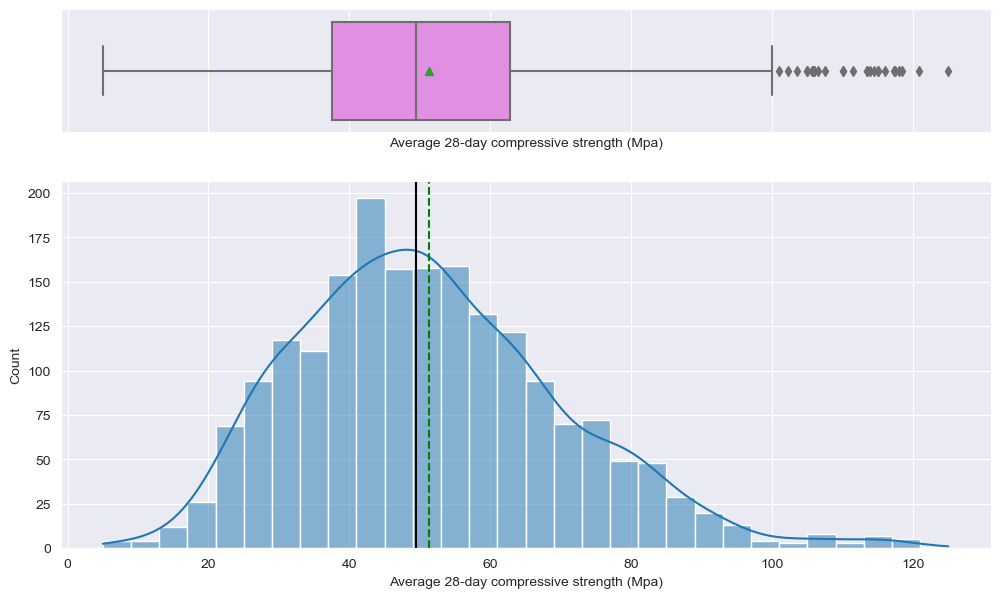

In [9]:
# Quick fix 

filtered_row = semi_df[semi_df['Average 28-day compressive strength (Mpa)'] > 400]

if len(filtered_row) == 1:
    value_to_divide = filtered_row['Average 28-day compressive strength (Mpa)'].values[0]
    updated_value = value_to_divide / 10

    # Update the value in the DataFrame
    semi_df.loc[semi_df['Average 28-day compressive strength (Mpa)'] > 400, 'Average 28-day compressive strength (Mpa)'] = updated_value
else:
    print("No rows or multiple rows matching the condition.")

hist_boxplot(semi_df, 'Average 28-day compressive strength (Mpa)')

## Curing method

In [10]:
num_df = semi_df.select_dtypes(include=np.number)
obj_df = semi_df.select_dtypes(include=['object'])

In [11]:
for col in obj_df.columns:
    value_counts = obj_df[col].value_counts()
    print(f"Column '{col}':")
    print(value_counts)
    print()

Column 'Data source':
1. Vu 2019            405
2. Yunusa 2014        144
J20. Atiş, 2005        96
J18. Cengiz 2006       90
20 Lollini 2021        72
                     ... 
11 Sundar 2017          4
22 Zhao 2021            4
J6. Li 1997             4
J30. Siddique 2004      4
J9. Li 2002             3
Name: Data source, Length: 71, dtype: int64

Column 'Curing method':
Submerged    837
Moist        503
Sealed       456
Air          184
Name: Curing method, dtype: int64

Column 'Specimen size':
150*150*150    461
200h*100r      215
100*100*100    158
100*100*300     22
300h*150r       12
100h*100r        5
Name: Specimen size, dtype: int64


In [12]:
curing_method = {'Air':0,
                 'Sealed':1,
                 'Moist':2,
                 'Submerged':3,
                 }

semi_df['Curing method'] = semi_df['Curing method'].map(curing_method)
semi_df['Curing method'].value_counts()


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


3.000    837
2.000    503
1.000    456
0.000    184
Name: Curing method, dtype: int64

In [13]:
new_df = semi_df.copy()
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1988 entries, 0 to 1987
Data columns (total 23 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Data source                                            1988 non-null   object 
 1   ASTM type 1 ordinary Portland Cement content (kg/m^3)  1988 non-null   float64
 2   CEM I 42.5N ordinary Portland Cement content (kg/m^3)  1988 non-null   float64
 3   CEM I 52.5N ordinary Portland Cement content (kg/m^3)  1988 non-null   float64
 4   Class C Fly ash content (kg/m^3)                       1988 non-null   float64
 5   Class F Fly ash content (kg/m^3)                       1988 non-null   float64
 6   Slag content (kg/m^3)                                  1988 non-null   float64
 7   Silica fume content (kg/m^3)                           1988 non-null   float64
 8   Water content (kg/m^3)                          

In [14]:
new_df = new_df.drop(['Curing humidity (%)', 'Curing day','Slump (mm)', 'Average carbonation coefficient (mm/year^0.5)', 'Average 28-day split strength (Mpa)', 'Average 28-day compressive strength (Mpa)', 'Specimen size'], axis = 1)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1988 entries, 0 to 1987
Data columns (total 16 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Data source                                            1988 non-null   object 
 1   ASTM type 1 ordinary Portland Cement content (kg/m^3)  1988 non-null   float64
 2   CEM I 42.5N ordinary Portland Cement content (kg/m^3)  1988 non-null   float64
 3   CEM I 52.5N ordinary Portland Cement content (kg/m^3)  1988 non-null   float64
 4   Class C Fly ash content (kg/m^3)                       1988 non-null   float64
 5   Class F Fly ash content (kg/m^3)                       1988 non-null   float64
 6   Slag content (kg/m^3)                                  1988 non-null   float64
 7   Silica fume content (kg/m^3)                           1988 non-null   float64
 8   Water content (kg/m^3)                          

In [15]:
new_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ASTM type 1 ordinary Portland Cement content (kg/m^3),1988.000,39.318,106.826,0.000,0.000,0.000,0.000,702.000
CEM I 42.5N ordinary Portland Cement content (kg/m^3),1988.000,95.567,146.591,0.000,0.000,0.000,210.000,547.000
CEM I 52.5N ordinary Portland Cement content (kg/m^3),1988.000,147.093,152.375,0.000,0.000,155.000,280.000,660.000
Class C Fly ash content (kg/m^3),1988.000,6.120,28.792,0.000,0.000,0.000,0.000,225.000
Class F Fly ash content (kg/m^3),1988.000,35.498,65.745,0.000,0.000,0.000,56.500,544.000
Slag content (kg/m^3),1988.000,34.630,73.838,0.000,0.000,0.000,0.000,440.000
Silica fume content (kg/m^3),1988.000,7.593,21.082,0.000,0.000,0.000,0.000,150.000
Water content (kg/m^3),1988.000,172.241,28.372,105.000,153.000,170.000,186.000,295.000
Superplasticizer content (kg/m^3),1988.000,2.336,4.726,0.000,0.000,0.000,2.703,35.100
Maximum coarse aggregate size (mm),1988.000,18.122,3.829,9.500,16.000,20.000,20.000,30.000


# Missing values

<Axes: >

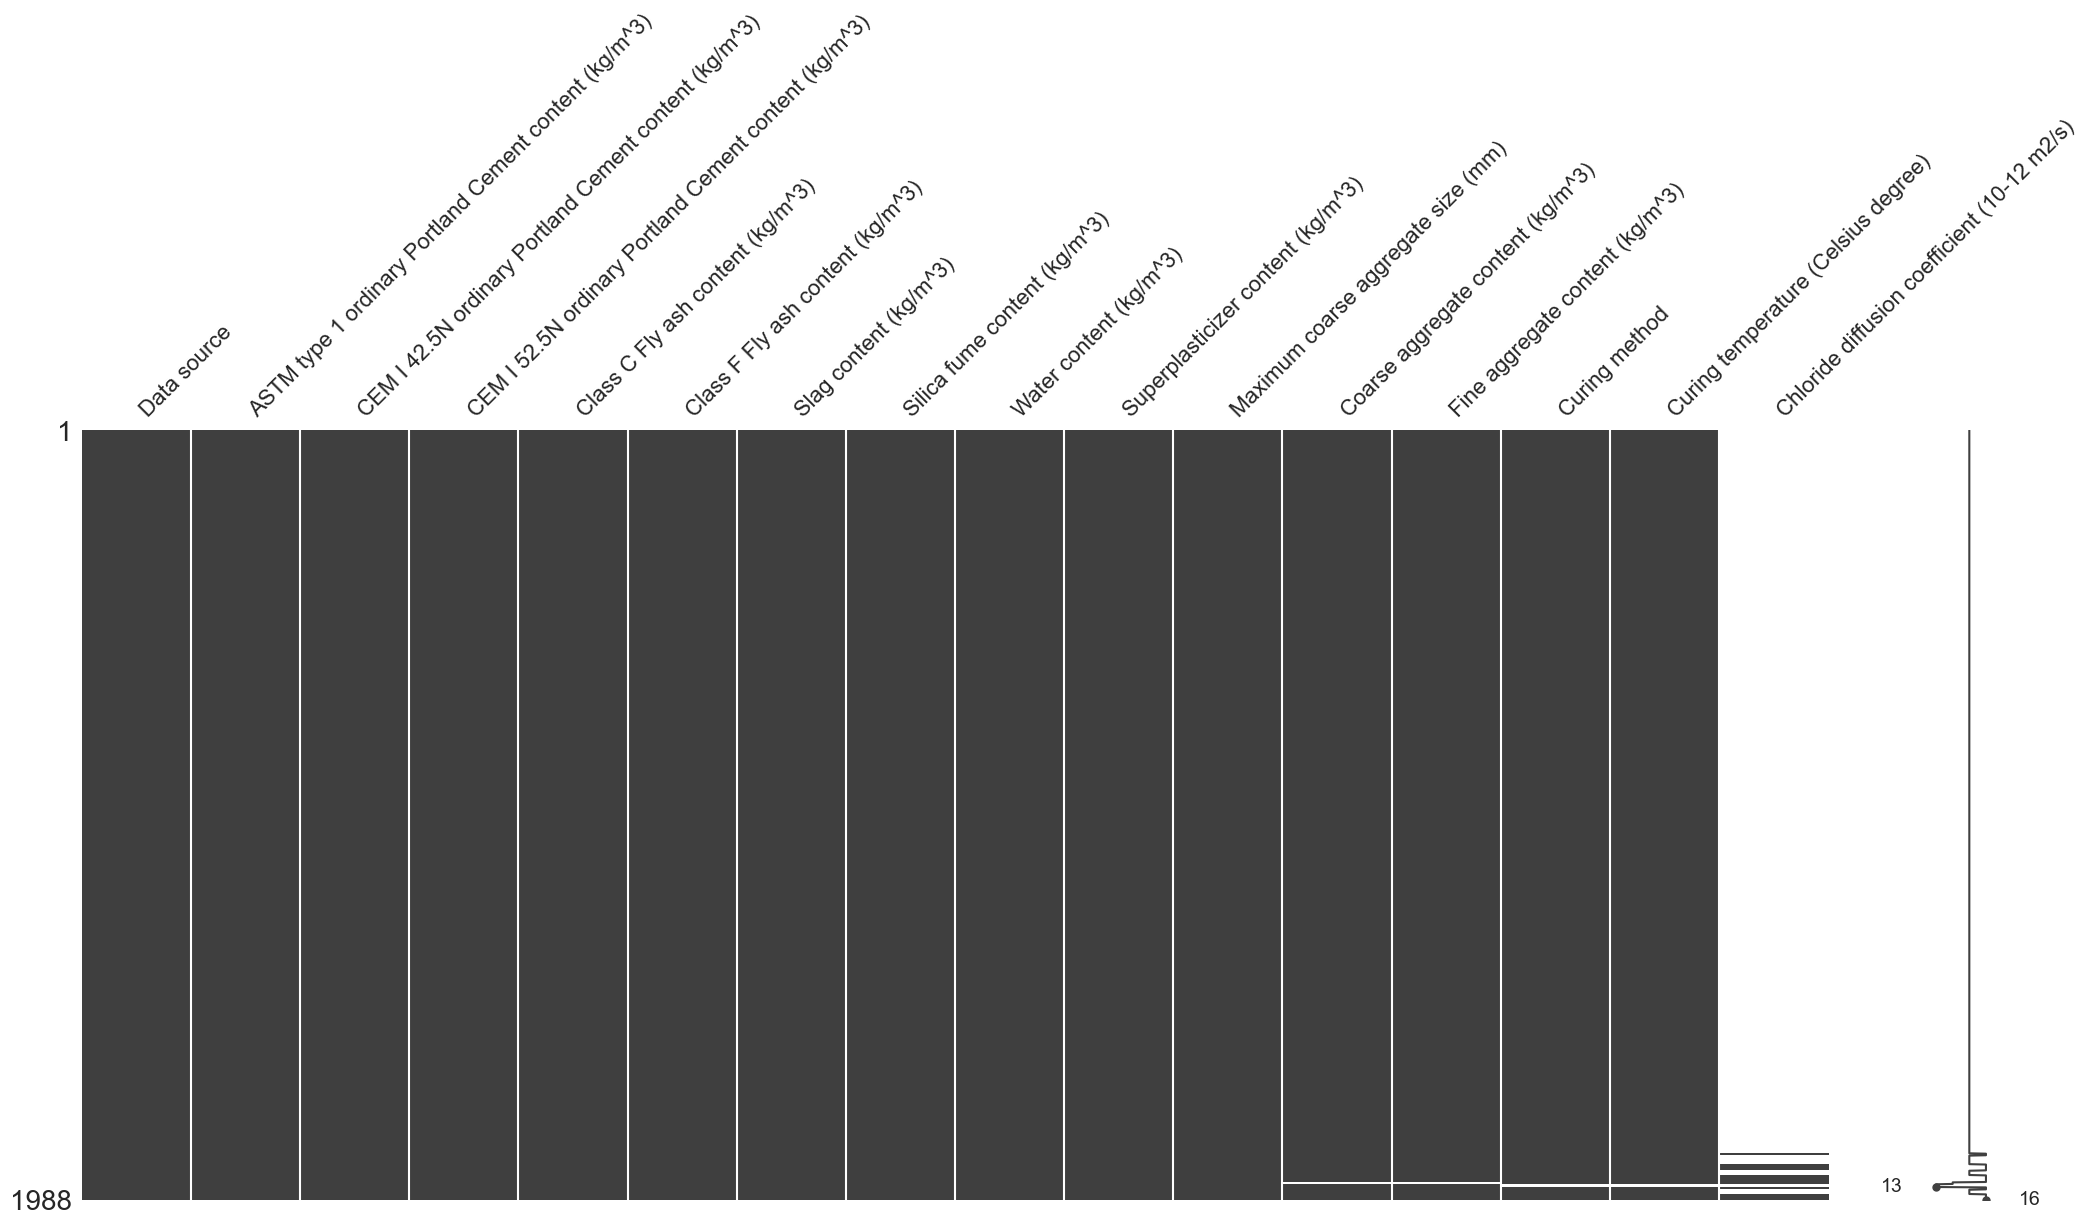

In [16]:
msno.matrix(new_df)

<Axes: >

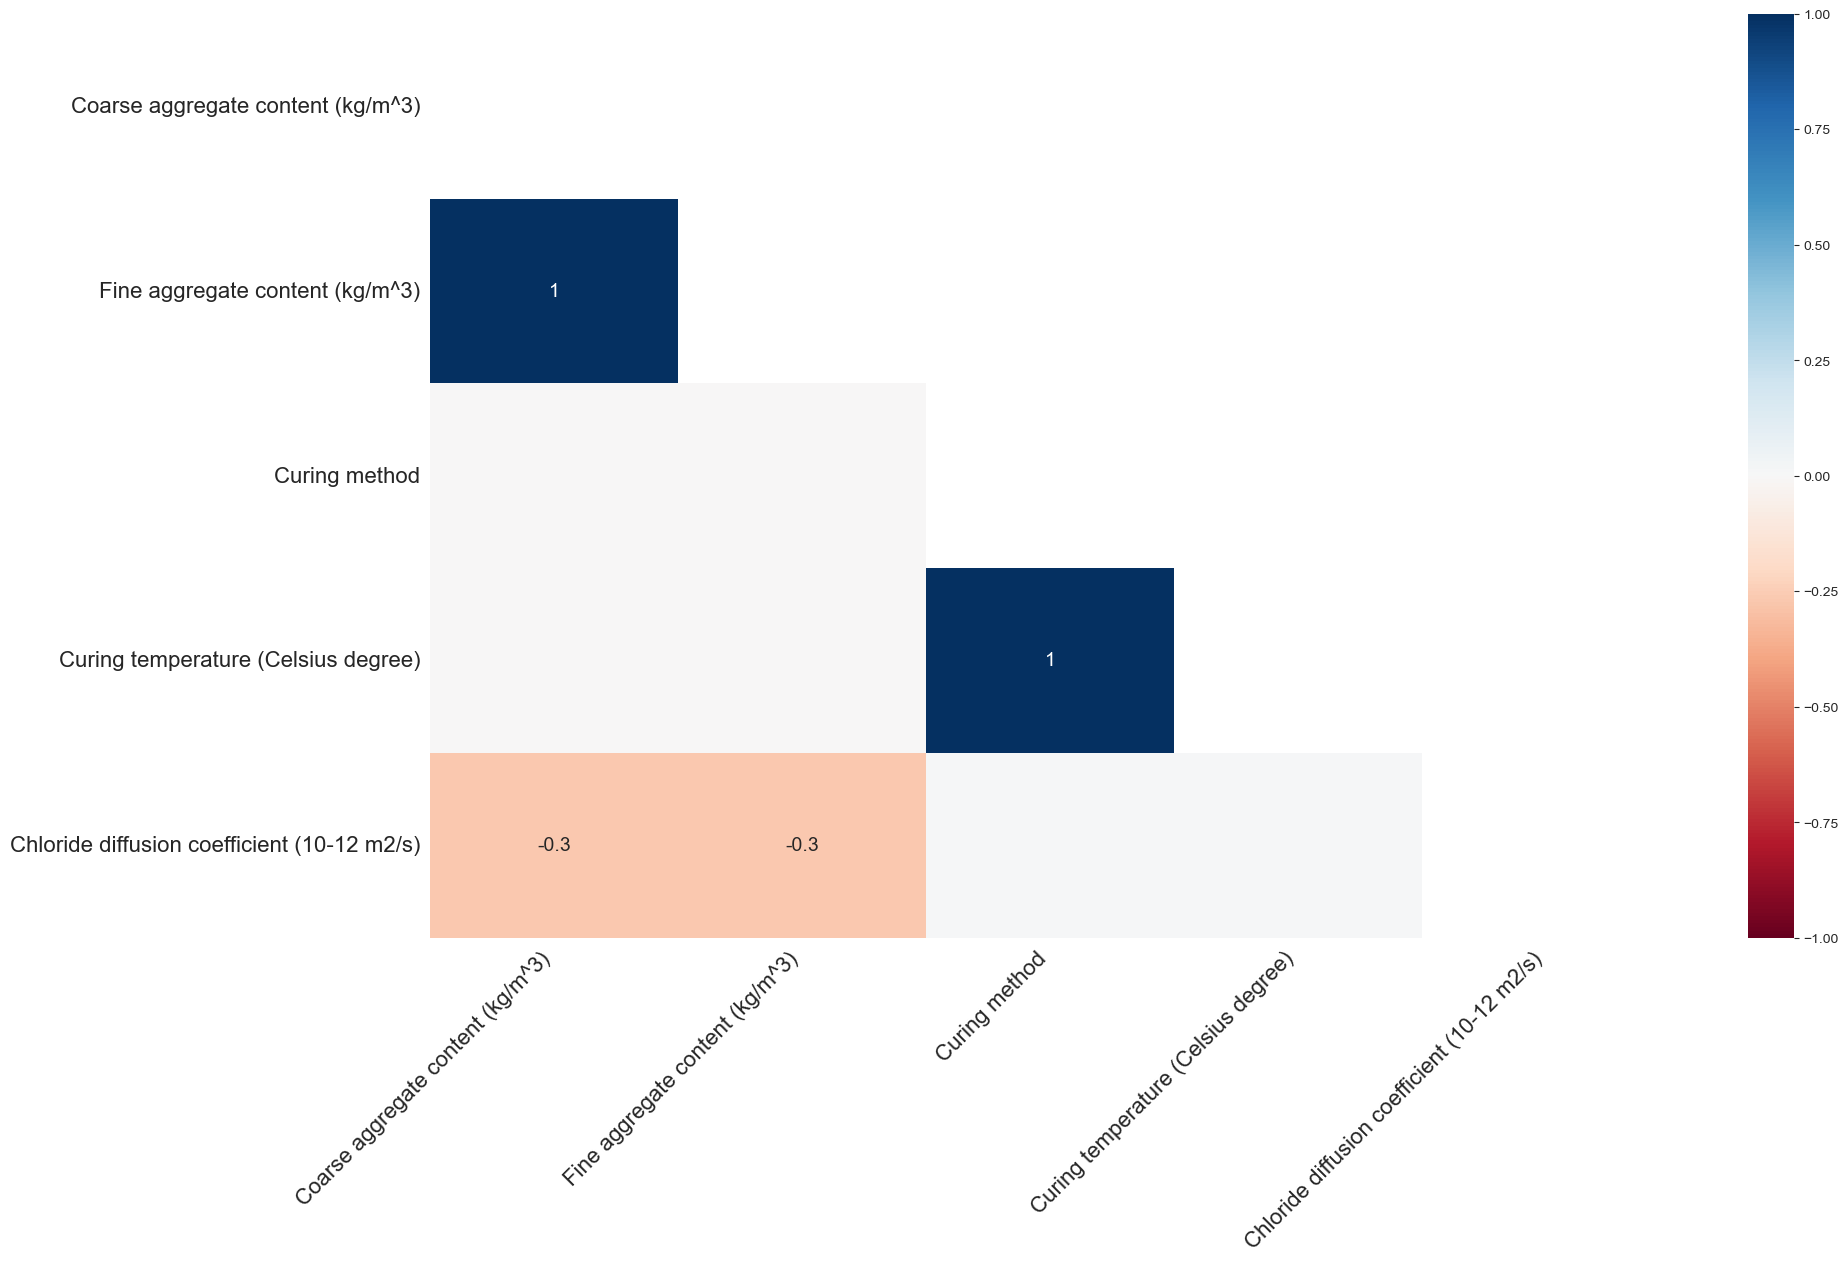

In [17]:
msno.heatmap(new_df)

# Drop na

In [18]:
new_df_drop = new_df.copy()
new_df_drop.dropna(inplace = True)

In [19]:
new_df_drop.isnull().sum()

Data source                                              0
ASTM type 1 ordinary Portland Cement content (kg/m^3)    0
CEM I 42.5N ordinary Portland Cement content (kg/m^3)    0
CEM I 52.5N ordinary Portland Cement content (kg/m^3)    0
Class C Fly ash content (kg/m^3)                         0
Class F Fly ash content (kg/m^3)                         0
Slag content (kg/m^3)                                    0
Silica fume content (kg/m^3)                             0
Water content (kg/m^3)                                   0
Superplasticizer content (kg/m^3)                        0
Maximum coarse aggregate size (mm)                       0
Coarse aggregate content (kg/m^3)                        0
Fine aggregate content (kg/m^3)                          0
Curing method                                            0
Curing temperature (Celsius degree)                      0
Chloride diffusion coefficient (10-12 m2/s)              0
dtype: int64

In [20]:
new_df_drop.describe().T

,count,mean,std,min,25%,50%,75%,max
ASTM type 1 ordinary Portland Cement content (kg/m^3),61.000,234.066,158.881,0.000,0.000,300.000,360.000,454.000
CEM I 42.5N ordinary Portland Cement content (kg/m^3),61.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
CEM I 52.5N ordinary Portland Cement content (kg/m^3),61.000,108.770,194.115,0.000,0.000,0.000,120.000,660.000
Class C Fly ash content (kg/m^3),61.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Class F Fly ash content (kg/m^3),61.000,18.164,45.777,0.000,0.000,0.000,0.000,220.000
Slag content (kg/m^3),61.000,51.689,85.459,0.000,0.000,0.000,108.000,275.000
Silica fume content (kg/m^3),61.000,10.213,16.942,0.000,0.000,0.000,20.000,50.000
Water content (kg/m^3),61.000,172.013,15.475,140.000,160.000,173.000,180.000,210.000
Superplasticizer content (kg/m^3),61.000,4.059,2.834,0.000,2.100,3.240,5.250,11.880
Maximum coarse aggregate size (mm),61.000,19.246,4.559,13.000,13.000,20.000,25.000,25.000


The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


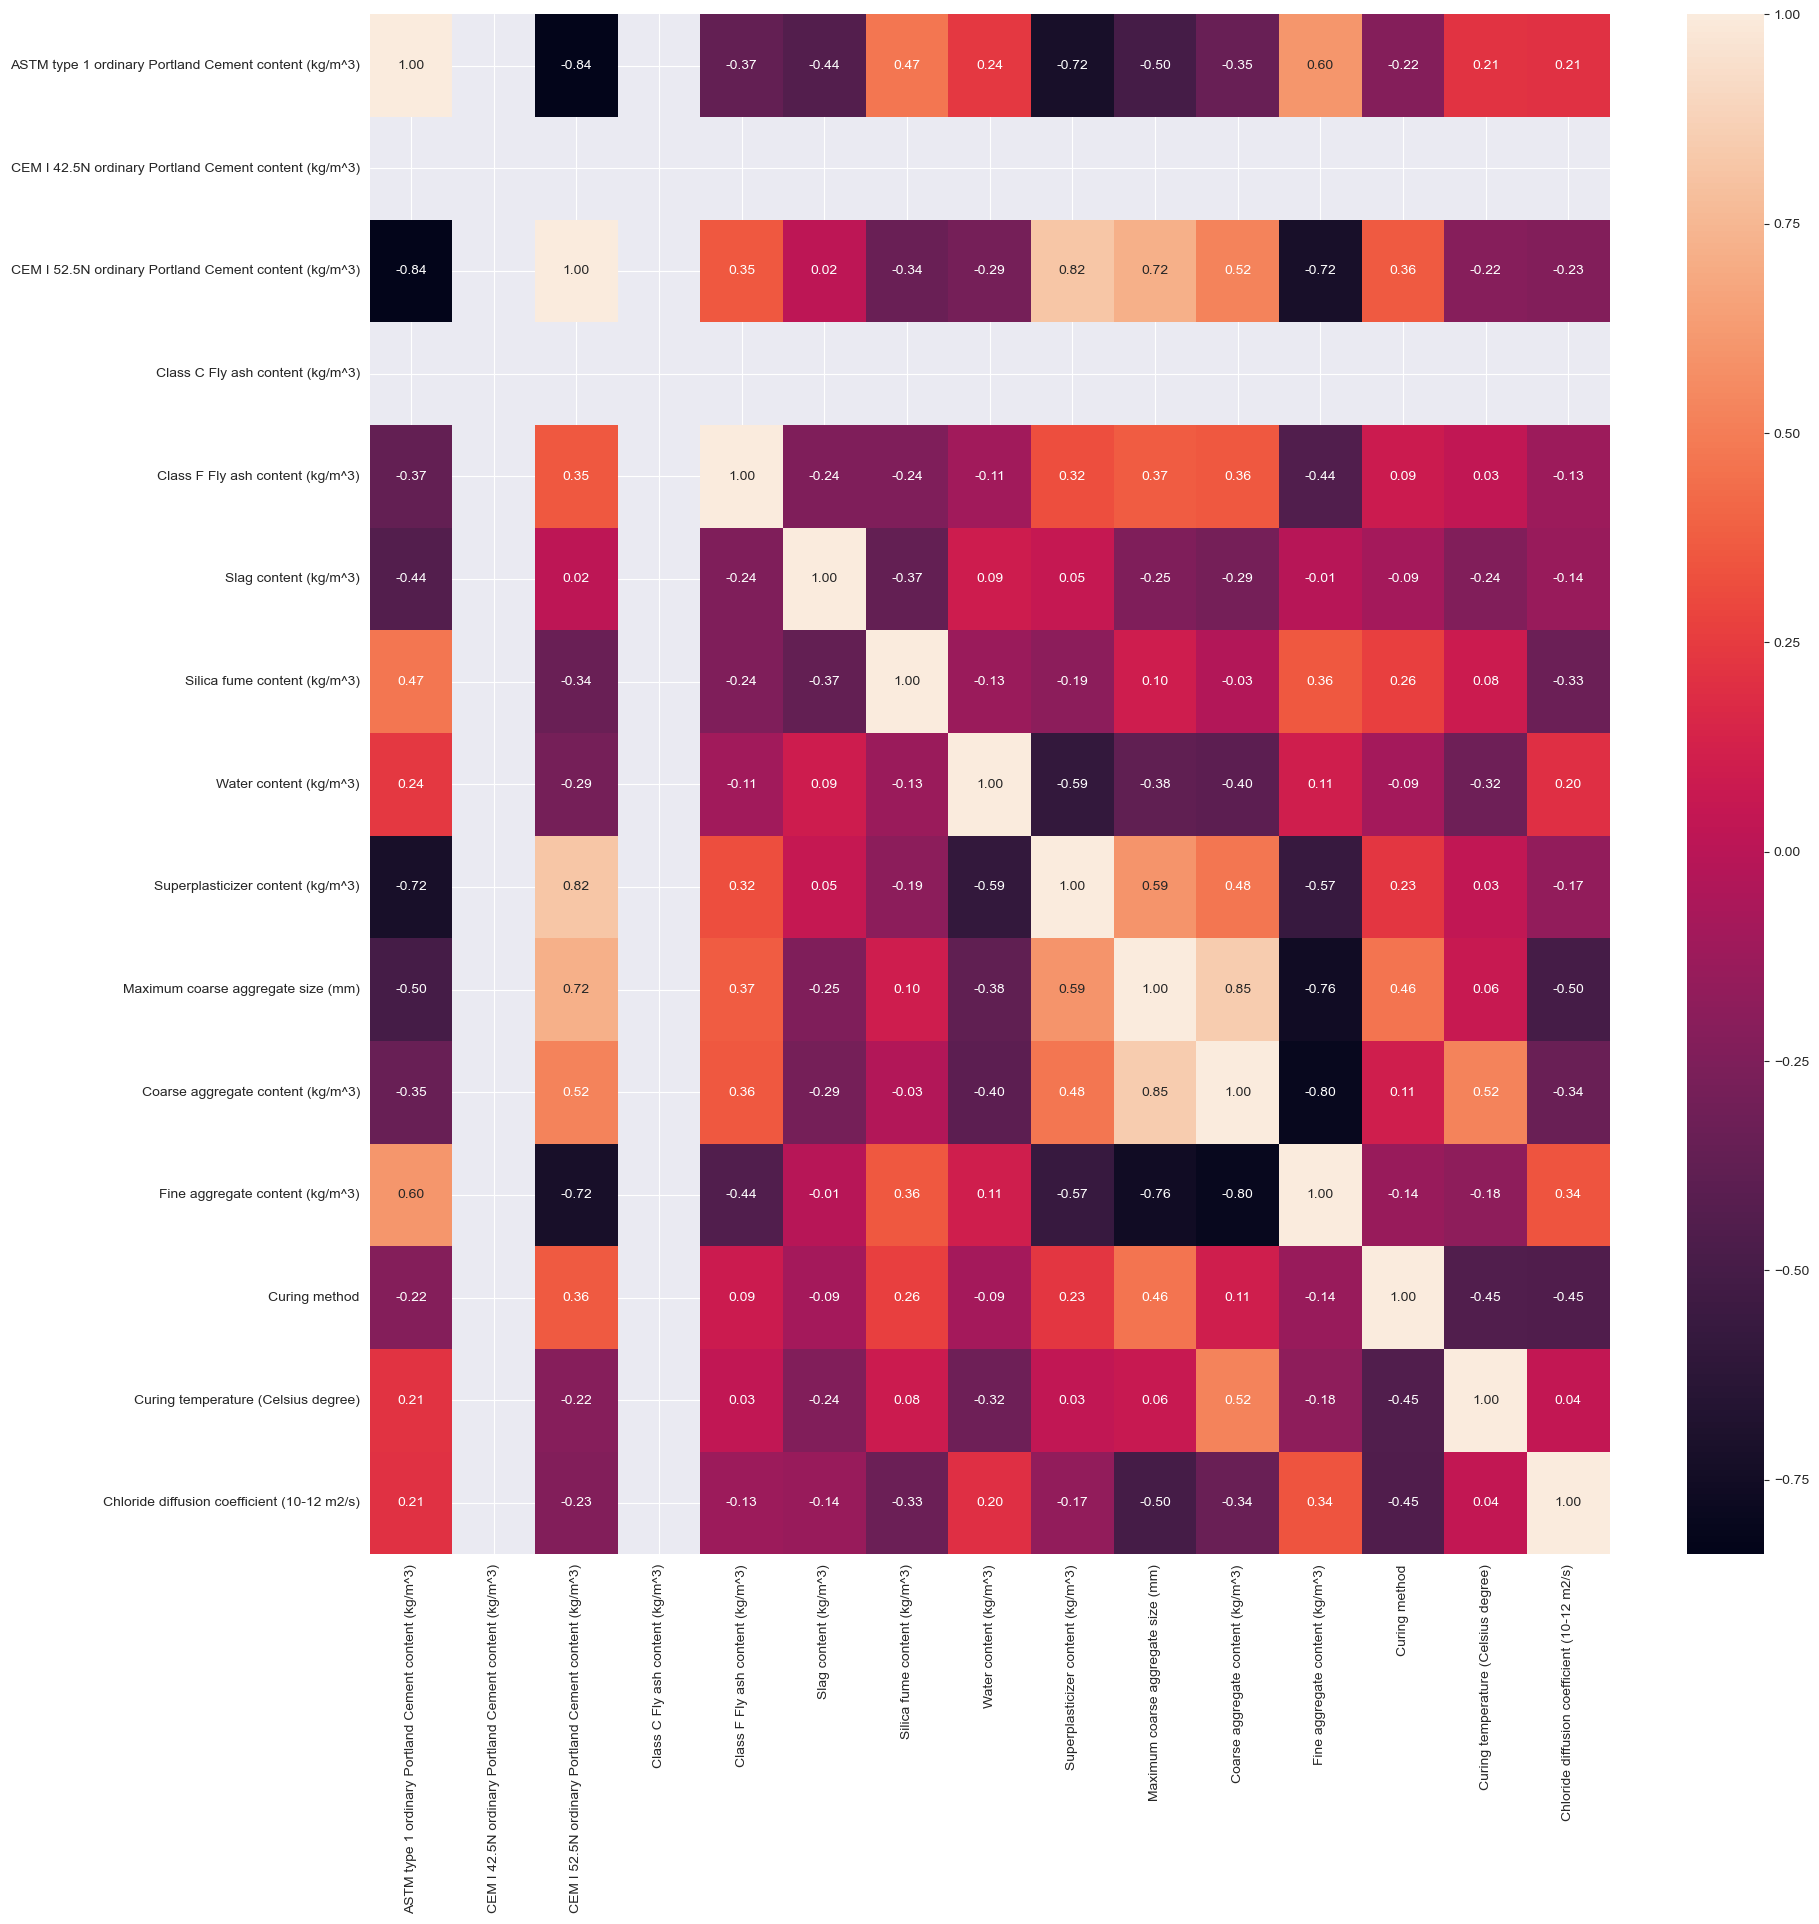

In [21]:
plt.figure(figsize=(20,20))
sns.heatmap(new_df_drop.corr(), annot = True, fmt='.2f', cmap = 'rocket')
plt.show()

In [22]:
new_df_drop = new_df_drop.drop(['CEM I 42.5N ordinary Portland Cement content (kg/m^3)', 'Class C Fly ash content (kg/m^3)'], axis =1)
new_df_drop.describe().T

,count,mean,std,min,25%,50%,75%,max
ASTM type 1 ordinary Portland Cement content (kg/m^3),61.000,234.066,158.881,0.000,0.000,300.000,360.000,454.000
CEM I 52.5N ordinary Portland Cement content (kg/m^3),61.000,108.770,194.115,0.000,0.000,0.000,120.000,660.000
Class F Fly ash content (kg/m^3),61.000,18.164,45.777,0.000,0.000,0.000,0.000,220.000
Slag content (kg/m^3),61.000,51.689,85.459,0.000,0.000,0.000,108.000,275.000
Silica fume content (kg/m^3),61.000,10.213,16.942,0.000,0.000,0.000,20.000,50.000
Water content (kg/m^3),61.000,172.013,15.475,140.000,160.000,173.000,180.000,210.000
Superplasticizer content (kg/m^3),61.000,4.059,2.834,0.000,2.100,3.240,5.250,11.880
Maximum coarse aggregate size (mm),61.000,19.246,4.559,13.000,13.000,20.000,25.000,25.000
Coarse aggregate content (kg/m^3),61.000,1015.056,117.262,867.000,867.000,1014.000,1120.000,1201.400
Fine aggregate content (kg/m^3),61.000,765.092,101.786,620.000,640.000,784.000,853.000,931.000


The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


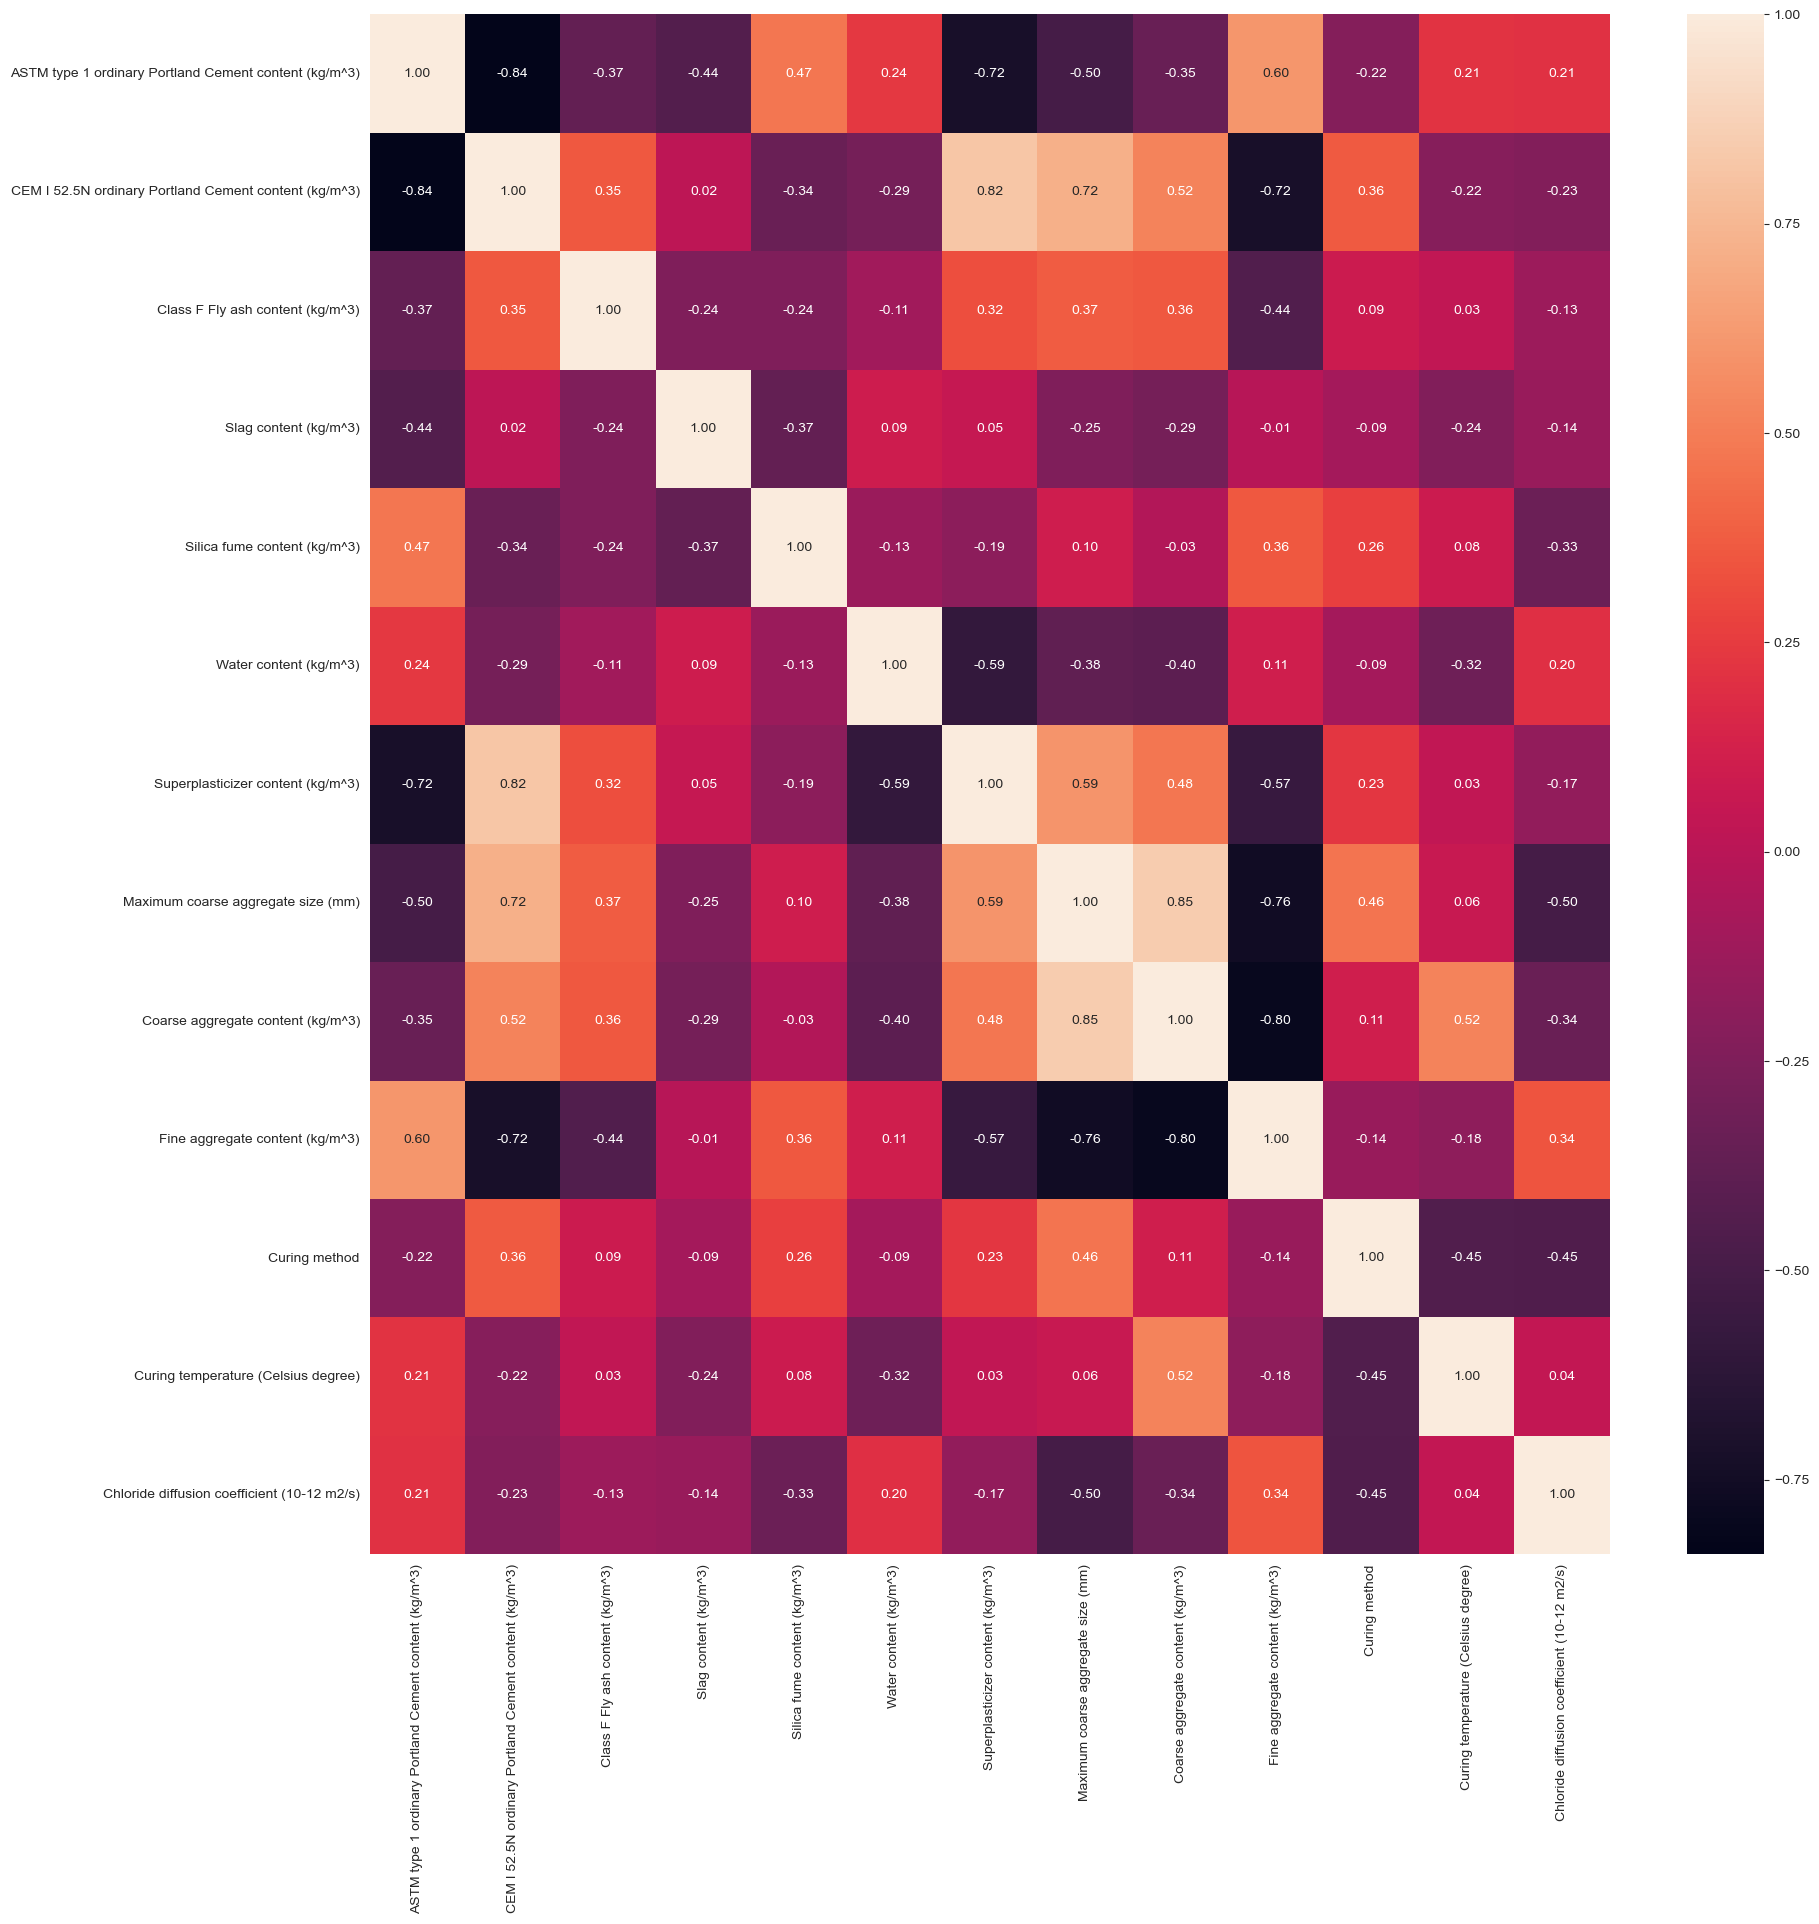

In [23]:
plt.figure(figsize=(20,20))
sns.heatmap(new_df_drop.corr(), annot = True, fmt='.2f', cmap = 'rocket')
plt.show()

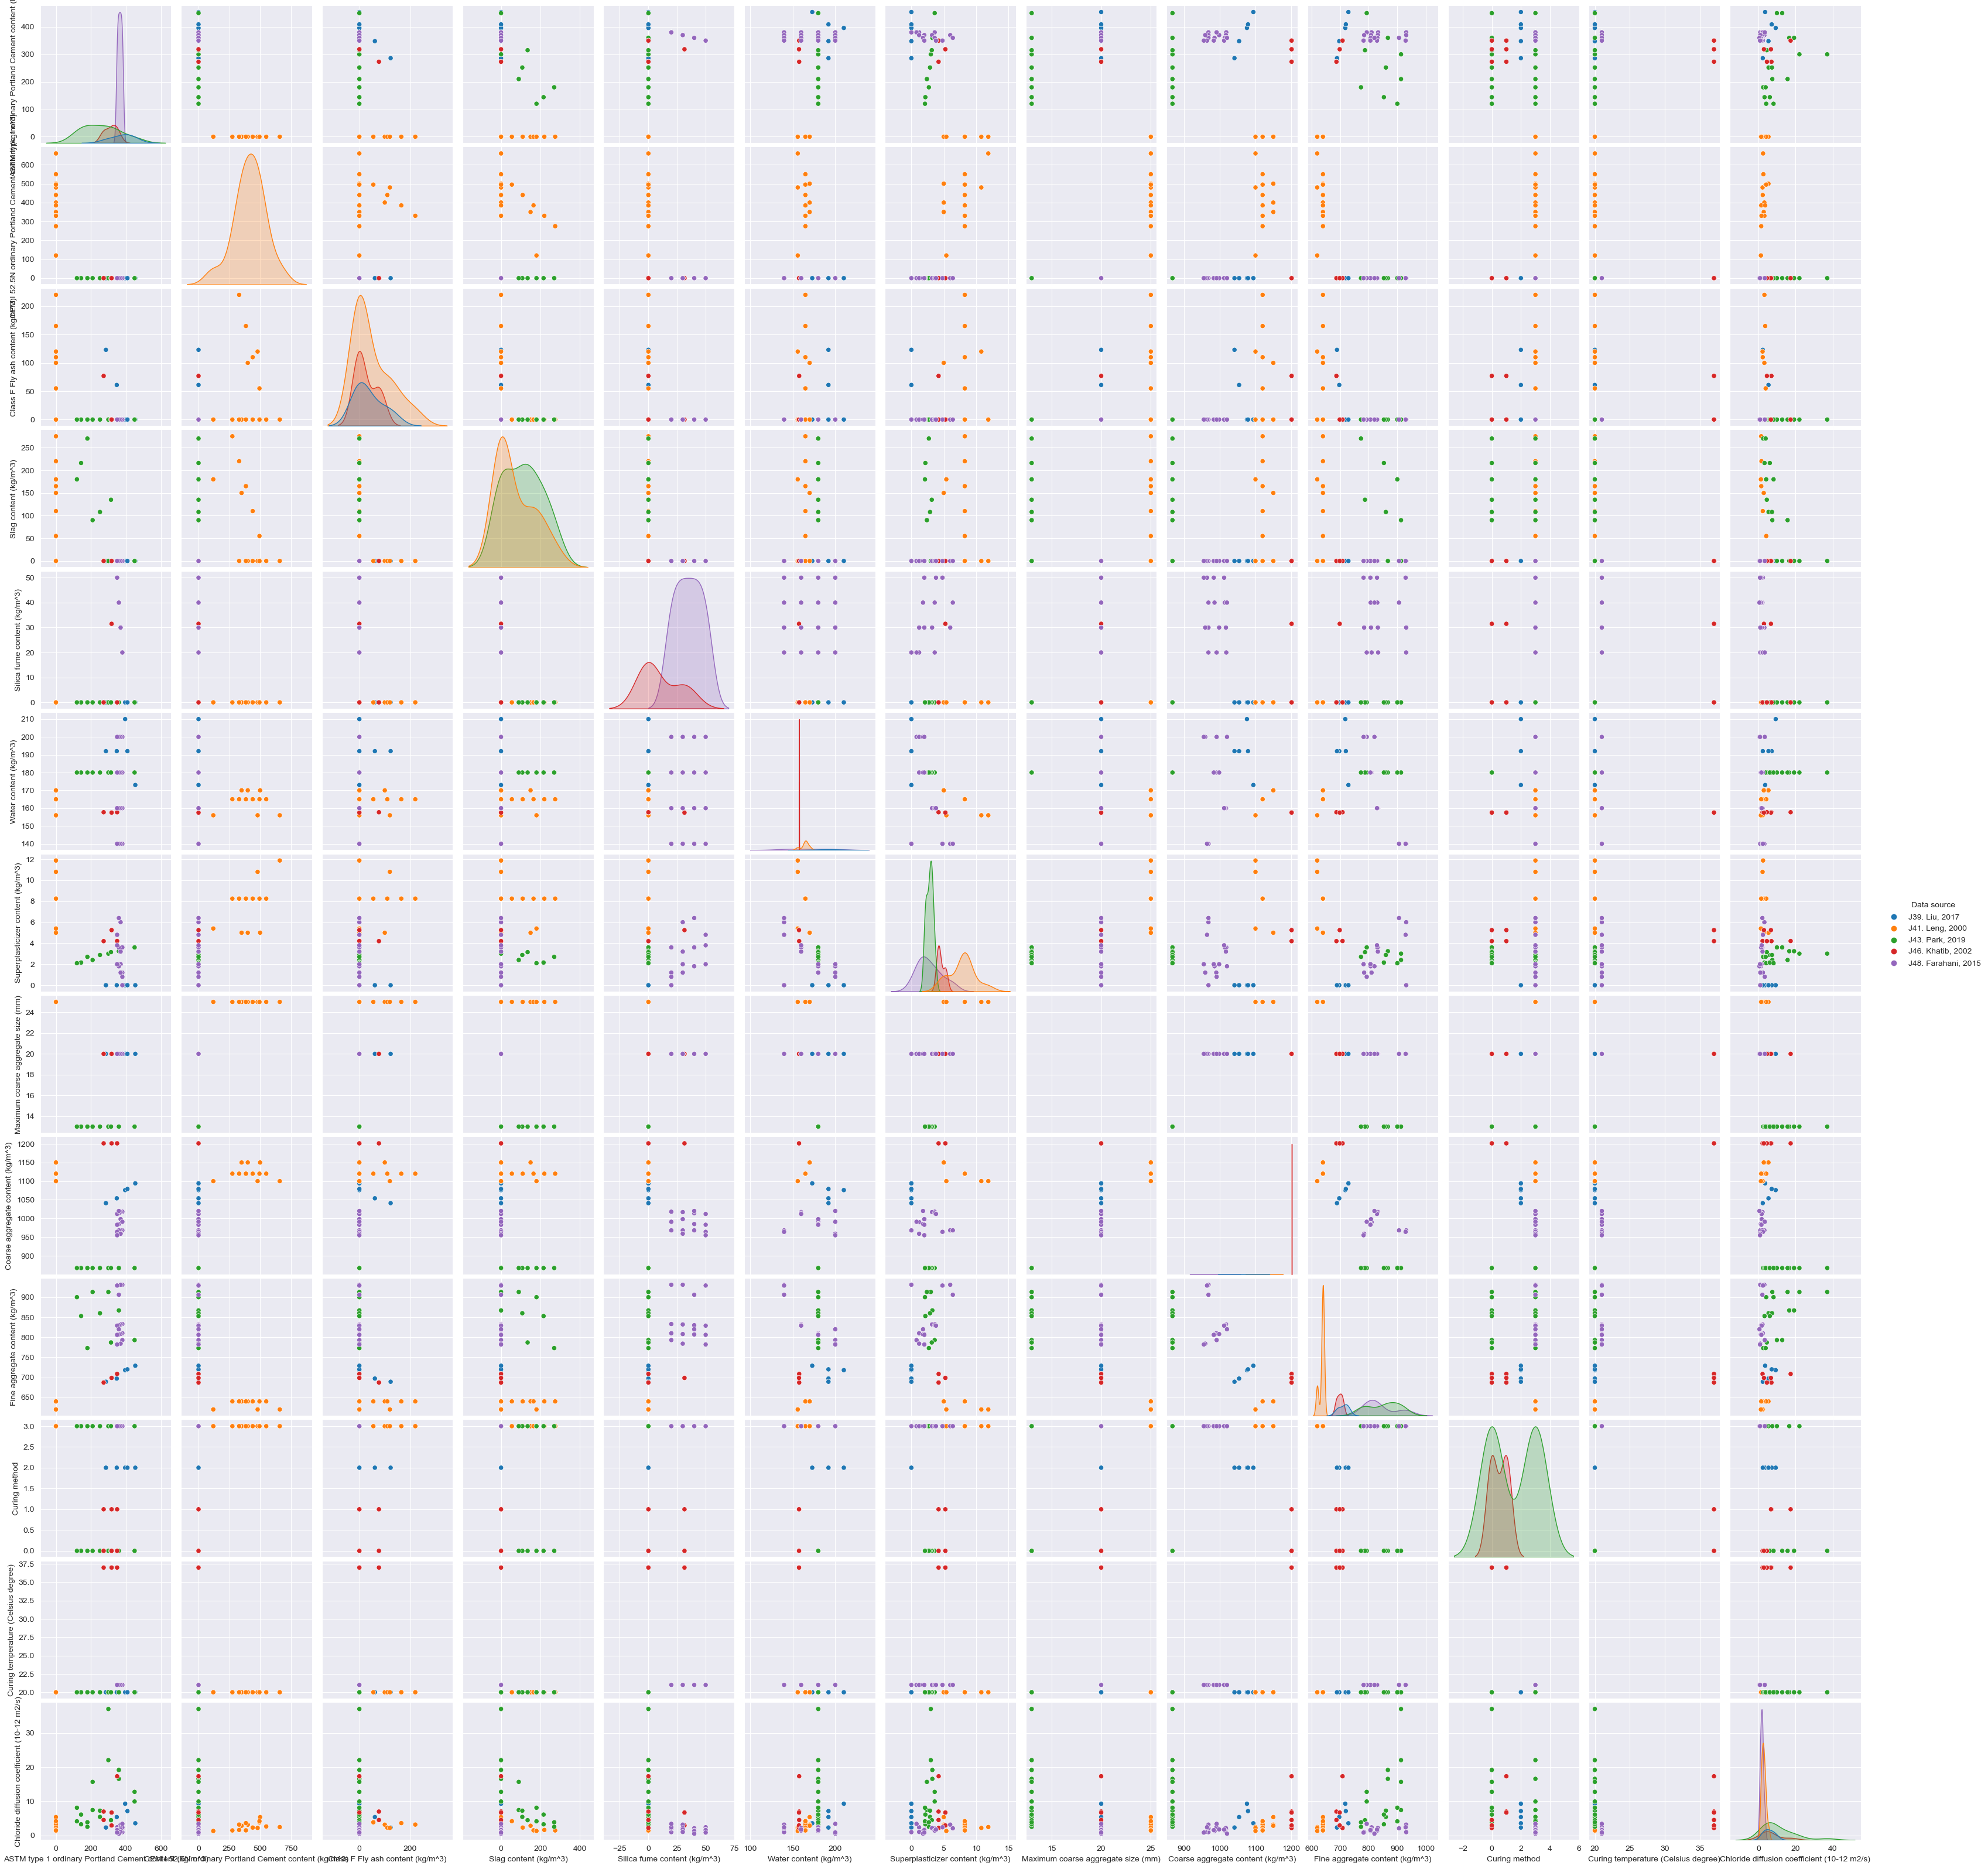

In [24]:
sns.pairplot(new_df_drop, hue= 'Data source', diag_kind= 'kde');
plt.show()

# Train test split

* Too few data, use k-fold validation instead

In [25]:
new_df_drop = new_df_drop.drop('Data source', axis = 1)
X = new_df_drop.drop('Chloride diffusion coefficient (10-12 m2/s)', axis =1)
Y = new_df_drop['Chloride diffusion coefficient (10-12 m2/s)']

# Model evaluation

* MAE, RMSE, R-square, and Adjusted R-square

In [26]:
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

In [27]:
def model_performance_regression(predictors,target,pred):
    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE

    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
        },
        index=[0],
    )

    return df_perf

# K fold

In [28]:
kfold =KFold(n_splits=10, random_state=42, shuffle=True)

# Model Building

In [29]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingRegressor(random_state=42)))
models.append(("Random forest", RandomForestRegressor(random_state=42)))
models.append(("AdaBoost", AdaBoostRegressor(random_state=42)))
models.append(("Gradient_Boost", GradientBoostingRegressor(random_state=42)))
models.append(("XGBoost", XGBRegressor(random_state=40)))

# Initialize lists to store performance metrics
results = []  # Store performance results for each model
model_names = []  # Store names of the models
model_performance = [] # Store performance of models
model_fit = [] #Store fitted models

# Perform k-fold cross-validation and evaluate performance for each model
for name, model in models:
    # Perform cross-validation
    scoring = make_scorer(mean_squared_error, greater_is_better=False)
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)

    # Calculate RMSE from the negative mean squared error
    rmse_scores = np.sqrt(-cv_results)

    # Store results
    results.append(rmse_scores)
    model_names.append(name)
    
    print("{}: mean RMSE = {:.3f}, std = {:.3f}".format(name, rmse_scores.mean(), rmse_scores.std()))
    
    model.fit(X, Y)
    model_fit.append(model)
    predictions = model.predict(X)
    performance = model_performance_regression(X, Y, predictions)
    model_performance.append((name, performance))

Bagging: mean RMSE = 3.605, std = 2.085
Random forest: mean RMSE = 3.009, std = 2.279
AdaBoost: mean RMSE = 3.891, std = 3.035
Gradient_Boost: mean RMSE = 3.324, std = 2.084
XGBoost: mean RMSE = 3.640, std = 2.685


In [30]:
# Create a DataFrame to display the performance results for each model
df_results = pd.DataFrame(results, index=model_names)
df_results

,0,1,2,3,4,5,6,7,8,9
Bagging,3.020,1.645,1.660,1.764,2.366,8.505,2.979,5.762,3.516,4.830
Random forest,2.221,1.132,1.054,1.641,1.114,8.098,1.915,5.636,2.280,5.000
AdaBoost,2.589,2.708,2.087,1.784,1.713,7.983,1.862,10.645,1.525,6.018
Gradient_Boost,2.213,2.500,1.767,2.119,1.548,8.039,2.352,5.448,1.808,5.442
XGBoost,3.666,1.636,2.022,1.585,1.822,8.372,1.121,8.415,2.108,5.654


In [31]:
performance_df = pd.DataFrame(columns=["Model", "RMSE", "MAE", "R-squared", "Adj. R-squared"])
# Populate DataFrame with model performances
for name, performance in model_performance:
    performance_df = performance_df.append({
        "Model": name,
        "RMSE": performance["RMSE"][0],
        "MAE": performance["MAE"][0],
        "R-squared": performance["R-squared"][0],
        "Adj. R-squared": performance["Adj. R-squared"][0]
    }, ignore_index=True)
performance_df

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


,Model,RMSE,MAE,R-squared,Adj. R-squared
0,Bagging,1.870,1.138,0.909,0.887
1,Random forest,1.413,0.804,0.948,0.935
2,AdaBoost,1.666,1.284,0.928,0.910
3,Gradient_Boost,0.515,0.296,0.993,0.991
4,XGBoost,0.001,0.001,1.000,1.000


# Hyperparameter tuning

## Bagging

In [32]:
%%time

Bagging_model = BaggingRegressor(random_state=42)

param_grid = {
    'n_estimators': [10, 50, 100],  # Number of base estimators (decision trees)
    'max_samples': [0.2, 0.3, 0.5, 0.8, 1.0],  # Proportion of samples to draw from the training set for each base estimator
    'max_features': [0.5, 0.8, 1.0],  # Proportion of features to consider for each base estimator
    'bootstrap': [True, False],  # Whether to sample with replacement (True) or without replacement (False)
    'random_state': [42]  # Random seed for reproducibility
}

scorer = metrics.make_scorer(mean_squared_error)

randomized_cv = RandomizedSearchCV(estimator=Bagging_model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=10, random_state=42)

randomized_cv.fit(X, Y)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'random_state': 42, 'n_estimators': 10, 'max_samples': 0.8, 'max_features': 1.0, 'bootstrap': True} with CV score=39.697533622142856:
CPU times: total: 750 ms
Wall time: 4.27 s


In [33]:
Tuned_Bagging = randomized_cv.best_estimator_
scoring = make_scorer(mean_squared_error, greater_is_better=False)
cv_results = cross_val_score(Tuned_Bagging, X, Y, cv=kfold, scoring=scoring)
rmse_scores = np.sqrt(-cv_results)

print("{}: mean RMSE = {:.3f}, std = {:.3f}".format('Bagging_tunned', rmse_scores.mean(), rmse_scores.std()))

Bagging_tunned: mean RMSE = 3.577, std = 2.208


In [34]:
Bag_tuned = pd.DataFrame({'Mean RMSE': [rmse_scores.mean()], 'Std': [rmse_scores.std()]})
Bag_tuned

,Mean RMSE,Std
0,3.577,2.208


In [35]:
cv_results*-1

array([13.97215925,  1.83719356,  1.55019062,  2.70609262,  5.94040333,
       74.04897387,  9.39096346, 37.4435298 ,  8.98327428, 20.81317475])

In [36]:
bag_tuned = Tuned_Bagging.fit(X, Y)
bag_tuned_result = Tuned_Bagging.predict(X)
Bagging_tuned = model_performance_regression(X, Y, bag_tuned_result)
Bagging_tuned

,RMSE,MAE,R-squared,Adj. R-squared
0,1.942,1.137,0.902,0.878


## Random Forest

In [37]:
%%time

Random_Forest = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [25, 50, 100, 200, 300, 500],  # Number of decision trees in the random forest
    'max_depth': [None, 5, 10, 15],  # Maximum depth of the decision trees
    'min_samples_split': [1, 2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': np.arange(1, 8),  # Minimum number of samples required to be at a leaf node
    'max_features': [None, 'sqrt', 'log2'],  # Number of features to consider at each split
    'bootstrap': [True, False],  # Whether to sample with replacement (True) or without replacement (False)
    'random_state': [42]  # Random seed for reproducibility
}

scorer = metrics.make_scorer(mean_squared_error)

randomized_cv = RandomizedSearchCV(estimator=Random_Forest, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=10, random_state=42)

randomized_cv.fit(X, Y)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'random_state': 42, 'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 7, 'max_features': None, 'max_depth': None, 'bootstrap': False} with CV score=48.695670385748734:
CPU times: total: 109 ms
Wall time: 1.41 s



30 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\leeno\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\leeno\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py", line 340, in fit
    self._validate_params()
  File "C:\Users\leeno\anaconda3\Lib\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\leeno\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py", line 97, in validate_parameter_constraints
    raise InvalidParam

In [38]:
Tuned_Forest = randomized_cv.best_estimator_
scoring = make_scorer(mean_squared_error, greater_is_better=False)
cv_results = cross_val_score(Tuned_Forest, X, Y, cv=kfold, scoring=scoring)
rmse_scores = np.sqrt(-cv_results)
print("{}: mean RMSE = {:.3f}, std = {:.3f}".format('Forest_tunned', rmse_scores.mean(), rmse_scores.std()))

Forest_tunned: mean RMSE = 3.664, std = 3.176


In [39]:
cv_results*-1

array([  4.23796068,   0.92754082,   0.49469718,   6.95958594,
         7.56281868, 129.45371864,  40.7415721 ,  37.50905277,
         1.59834697,   5.67295637])

In [40]:
forest_tuned = Tuned_Forest.fit(X, Y)
forest_tuned_result = Tuned_Forest.predict(X)
Forest_tuned = model_performance_regression(X, Y, forest_tuned_result)
Forest_tuned

,RMSE,MAE,R-squared,Adj. R-squared
0,3.686,1.943,0.648,0.560


## Ada Boosting

In [41]:
%%time

Ada_boost = AdaBoostRegressor(random_state=42)

param_grid = {
    'n_estimators': [10, 25, 50, 100, 200, 500, 1000],  # Number of base estimators
    'learning_rate': [10, 5, 2.5, 1.5, 1, 0.5, 0.2, 0.1, 0.01, 0.001],  # Learning rate shrinks the contribution of each base estimator
    'loss': ['linear', 'square', 'exponential'],  # Loss function to use when updating the weights after each boosting iteration
    'random_state': [42]  # Random seed for reproducibility
}

scorer = metrics.make_scorer(mean_squared_error)

randomized_cv = RandomizedSearchCV(estimator=Ada_boost, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=10, random_state=42)

randomized_cv.fit(X, Y)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'random_state': 42, 'n_estimators': 50, 'loss': 'square', 'learning_rate': 5} with CV score=993.4998873761891:
CPU times: total: 125 ms
Wall time: 1.12 s


In [42]:
Tuned_Ada = randomized_cv.best_estimator_
scoring = make_scorer(mean_squared_error, greater_is_better=False)
cv_results = cross_val_score(Tuned_Ada, X, Y, cv=kfold, scoring=scoring)
rmse_scores = np.sqrt(-cv_results)
print("{}: mean RMSE = {:.3f}, std = {:.3f}".format('Ada_tunned', rmse_scores.mean(), rmse_scores.std()))

Ada_tunned: mean RMSE = 30.900, std = 5.097


In [43]:
cv_results*-1

array([ 955.10610071, 1148.0392375 , 1089.86577817, 1182.64530833,
       1089.664419  ,  295.21038017, 1123.3725    ,  687.6609375 ,
       1113.87536033, 1122.31313033])

## Gradient Boosting

In [44]:
%%time

GradientBoost = GradientBoostingRegressor(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200, 500, 750],  # Number of boosting stages
    'learning_rate': [1.2, 1, 0.1, 0.01, 0.001],  # Learning rate shrinks the contribution of each tree
    'max_depth': [3, 5, 7],  # Maximum depth of the individual regression estimators
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4,6, 8, 10],  # Minimum number of samples required to be at a leaf node
    'max_features': [None, 'sqrt', 'log2', 'sqrt'],  # Number of features to consider at each split
    'loss': ['absolute_error', 'squared_error', 'quantile', 'huber'],  # Loss function to optimize
    'random_state': [42]  # Random seed for reproducibility
}

scorer = metrics.make_scorer(mean_squared_error)

randomized_cv = RandomizedSearchCV(estimator=GradientBoost, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=10, random_state=42)

randomized_cv.fit(X, Y)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'random_state': 42, 'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'max_depth': 5, 'loss': 'quantile', 'learning_rate': 0.01} with CV score=90.02329229838952:
CPU times: total: 188 ms
Wall time: 3.89 s


In [45]:
Tuned_Gra = randomized_cv.best_estimator_
scoring = make_scorer(mean_squared_error, greater_is_better=False)
cv_results = cross_val_score(Tuned_Gra, X, Y, cv=kfold, scoring=scoring)
rmse_scores = np.sqrt(-cv_results)
print("{}: mean RMSE = {:.3f}, std = {:.3f}".format('Gra_tunned', rmse_scores.mean(), rmse_scores.std()))

Gra_tunned: mean RMSE = 8.605, std = 1.722


In [46]:
cv_results*-1

array([ 36.20014769,  98.76319521,  65.04479771, 102.43541781,
        61.87650069, 129.19341015,  94.29638796,  39.05772736,
        49.45662517,  93.82482983])

## XG Boost

In [47]:
%%time

XG_boost = XGBRegressor(random_state = 42)

param_grid = {
    'n_estimators': [25, 50, 100, 200, 500, 750],  # Number of boosting stages
    'learning_rate': [1, 0.2, 0.1, 0.01, 0.001],  # Learning rate shrinks the contribution of each tree
    'max_depth': [3, 5, 7, 9, 15],  # Maximum depth of a tree
    'subsample': [0.8, 0.9, 1.0],  # Subsample ratio of the training instances
    'colsample_bytree': [0.8, 0.9, 1.0],  # Subsample ratio of columns when constructing each tree
    'gamma': [0, 0.1, 0.2],  # Minimum loss reduction required to make a further partition on a leaf node
    'reg_alpha': [0, 0.1, 0.2, 0.5],  # L1 regularization term on weights
    'reg_lambda': [0, 0.1, 0.2, 0.5],  # L2 regularization term on weights
    'random_state': [42]  # Random seed for reproducibility
}

scorer = metrics.make_scorer(mean_squared_error)

randomized_cv = RandomizedSearchCV(estimator=XG_boost, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=10, random_state=42)

randomized_cv.fit(X, Y)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.8, 'reg_lambda': 0.1, 'reg_alpha': 0, 'random_state': 42, 'n_estimators': 750, 'max_depth': 15, 'learning_rate': 1, 'gamma': 0.2, 'colsample_bytree': 0.8} with CV score=68.6764429640821:
CPU times: total: 29.3 s
Wall time: 2.69 s


In [48]:
Tuned_XG = randomized_cv.best_estimator_
scoring = make_scorer(mean_squared_error, greater_is_better=False)
cv_results = cross_val_score(Tuned_XG, X, Y, cv=kfold, scoring=scoring)
rmse_scores = np.sqrt(-cv_results)
print("{}: mean RMSE = {:.3f}, std = {:.3f}".format('XG_tunned', rmse_scores.mean(), rmse_scores.std()))

XG_tunned: mean RMSE = 4.934, std = 2.488


In [49]:
cv_results*-1

array([  3.04229748,  37.89282817,  35.16350476,  11.90923911,
         3.21169753,  40.28893627,  10.93558712, 106.81737257,
        14.87196389,  41.22319698])

# Best model 

* Gradient Boost (needs more testing)! 

In [50]:
model_fit

[BaggingRegressor(random_state=42),
 RandomForestRegressor(random_state=42),
 AdaBoostRegressor(random_state=42),
 GradientBoostingRegressor(random_state=42),
 XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=40, ...)]

In [51]:
selected_model = model_fit[3]
y_pred = selected_model.predict(X)
df_predictions = pd.DataFrame({'True Values': Y, 'Predicted Values': y_pred})
df_predictions

,True Values,Predicted Values
1867,9.270,9.256
1868,7.120,6.890
1869,3.550,3.738
1870,5.370,5.268
1871,2.300,2.536
...,...,...
1983,1.550,1.430
1984,3.375,2.835
1985,1.000,1.387
1986,0.500,0.684


In [52]:
df_predictions['Difference'] = df_predictions['True Values'] - df_predictions['Predicted Values']
df_predictions

,True Values,Predicted Values,Difference
1867,9.270,9.256,0.014
1868,7.120,6.890,0.230
1869,3.550,3.738,-0.188
1870,5.370,5.268,0.102
1871,2.300,2.536,-0.236
...,...,...,...
1983,1.550,1.430,0.120
1984,3.375,2.835,0.540
1985,1.000,1.387,-0.387
1986,0.500,0.684,-0.184


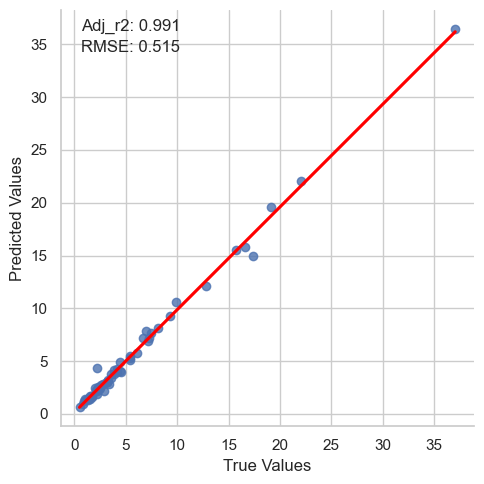

In [53]:
r2 = r2_score(df_predictions['True Values'], df_predictions['Predicted Values'])
adj_r2 = adj_r2_score(X, Y, y_pred)
rmse = mean_squared_error(df_predictions['True Values'], df_predictions['Predicted Values'], squared=False)

# Create the lmplot
sns.set(style="whitegrid")
lm_plot = sns.lmplot(data=df_predictions, x='True Values', y='Predicted Values', ci=True, line_kws={'color': 'red'})

# Annotate the plot with R2 and RMSE
plt.text(0.05, 0.95, f'Adj_r2: {adj_r2:.3f}', transform=plt.gca().transAxes)
plt.text(0.05, 0.9, f'RMSE: {rmse:.3f}', transform=plt.gca().transAxes)

# Display the plot
plt.show()

# SHAP

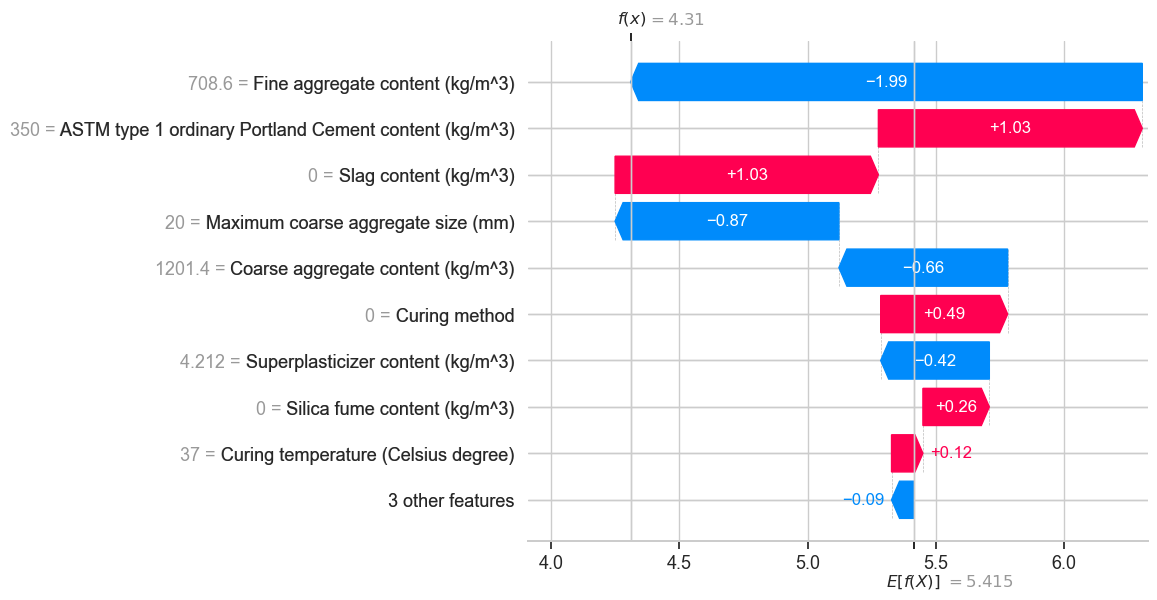

In [54]:
explainer = shap.Explainer(selected_model.predict, X)
shap_values = explainer(X)
sample_ind = 42
shap.plots.waterfall(shap_values[sample_ind])

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


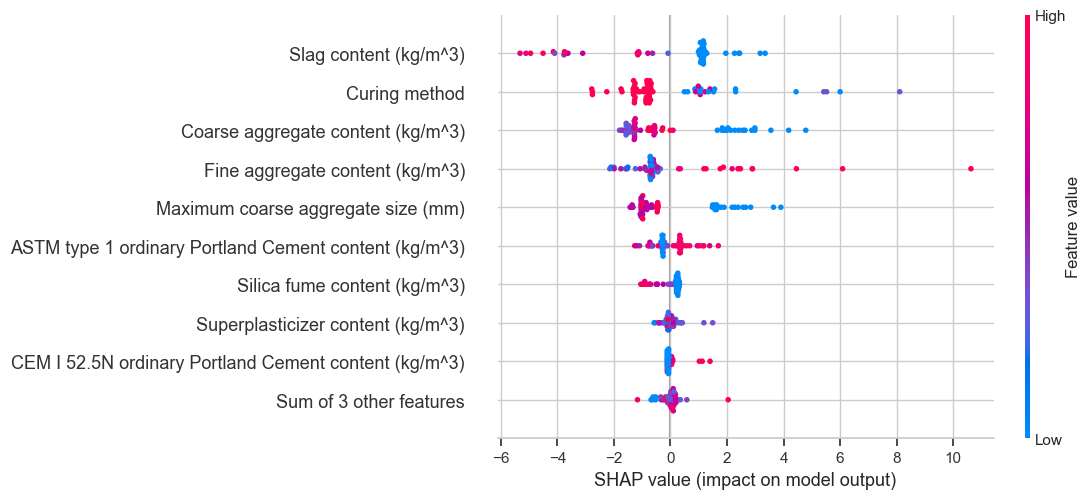

In [55]:
shap.plots.beeswarm(shap_values)